In [1]:
import logging
from pathlib import Path
from typing import Sequence

import albumentations as A
from albumentations.pytorch import ToTensorV2

from pandas import DataFrame
import cv2
import numpy as np
import matplotlib.figure
import matplotlib.pyplot as plt

In [2]:
def get_image_height_and_width(image_size: int | tuple[int, int]) -> tuple[int, int]:
    """Get image height and width from ``image_size`` variable.

    Args:
        image_size (int | tuple[int, int] | None, optional): Input image size.

    Raises:
        ValueError: Image size not None, int or tuple.

    Examples:
        >>> get_image_height_and_width(image_size=256)
        (256, 256)

        >>> get_image_height_and_width(image_size=(256, 256))
        (256, 256)

        >>> get_image_height_and_width(image_size=(256, 256, 3))
        (256, 256)

        >>> get_image_height_and_width(image_size=256.)
        Traceback (most recent call last):
        File "<string>", line 1, in <module>
        File "<string>", line 18, in get_image_height_and_width
        ValueError: ``image_size`` could be either int or tuple[int, int]

    Returns:
        tuple[int | None, int | None]: A tuple containing image height and width values.
    """
    if isinstance(image_size, int):
        height_and_width = (image_size, image_size)
    elif isinstance(image_size, tuple):
        height_and_width = int(image_size[0]), int(image_size[1])
    else:
        raise ValueError("``image_size`` could be either int or tuple[int, int]")

    return height_and_width

In [3]:
path = "../../projects/dataset_loco/bottle/train/good/000.png"
# /Users/furyhawk/projects/dataset_loco/bottle/train/good
path = path if isinstance(path, str) else str(path)
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [4]:
resize_height, resize_width = get_image_height_and_width(image_size=(256, 256))

In [5]:
transforms_list = []
transforms_list.append(A.Resize(height=resize_height, width=resize_width, always_apply=True))
transforms_list.append(A.CenterCrop(height=resize_height, width=resize_width, always_apply=True))
transforms_list.append(A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)))
transforms_list.append(ToTensorV2())
transforms = A.Compose(transforms_list)

In [6]:
# image = transforms(image=image)["image"]

In [7]:
# image.type()

In [8]:
# import torch
# mps = torch.device('mps')
# torch.ones([2, 4], dtype=torch.float32, device=mps)

In [9]:
# mask = np.zeros(shape=image.shape[:2], dtype=np.float32)

In [10]:
# import torch
# torch.from_numpy(mask).type()

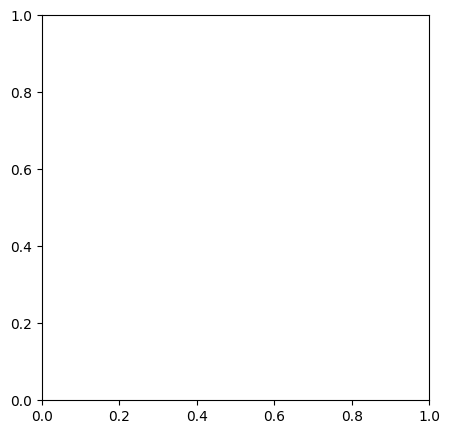

In [11]:
num_cols = len([image])
figure_size = (num_cols * 5, 5)
figure, axis = plt.subplots(1, num_cols, figsize=figure_size)
figure.subplots_adjust(right=0.9)

In [15]:
axes = axis if isinstance(axis, np.ndarray) else np.array([axis])
for axis, image_dict in zip(axes, [image]):
    axis.axes.xaxis.set_visible(False)
    axis.axes.yaxis.set_visible(False)
    axis.imshow(image_dict, vmin=0, vmax=255)

figure.canvas.draw()


In [16]:
# convert canvas to numpy array to prepare for visualization with opencv
img = np.frombuffer(figure.canvas.tostring_rgb(), dtype=np.uint8)
img = img.reshape(figure.canvas.get_width_height()[::-1] + (3,))
plt.close(figure)

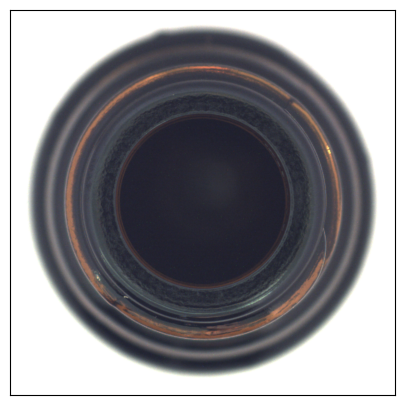

In [17]:
figure

In [14]:
img.shape

(500, 500, 3)